In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Bank note dataset

In [2]:
# load bank note data
data = pd.read_csv('bank_notes.csv')
data.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


# SVM

### trial 1

## SVM with 80/20 on bank note dataset trial 1

In [3]:
X = data[["V1","V2","V3","V4"]]
Y = data["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [4]:
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, classifier):
    Y_pred = classifier.predict(X)
    e = 1 - accuracy_score(Y, Y_pred)
    return e


# Draw the heatmap of training errors.
def draw_heatmap(training_errors, gamma_list, C_list):
    # training_errors: A NumPy array with the shape (len(C_list), len(gamma_list))
    # gamma_list: List of gamma(s).
    # C_list: List of C(s).
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Training error w.r.t $C$ and $\gamma$')
    plt.show()
    
    
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

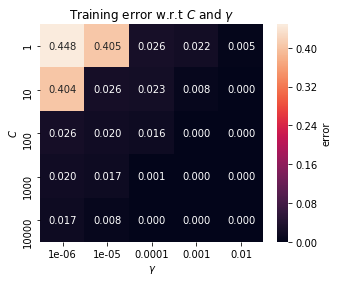

In [5]:
draw_heatmap(training_errors, gamma_list, C_list)

In [6]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.0


## SVM with 50/50 on bank note dataset trial 1


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [8]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

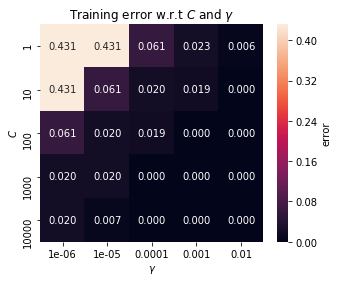

In [9]:
draw_heatmap(training_errors, gamma_list, C_list)

In [10]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.0


## SVM with 20/80 on bank note dataset trial 1


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [12]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

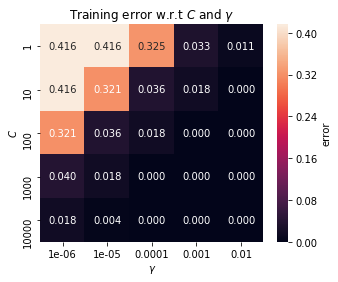

In [13]:
draw_heatmap(training_errors, gamma_list, C_list)

In [14]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.002732240437158473


### Trial 2

## SVM with 80/20 on bank note dataset trial 2


In [15]:
X = data[["V1","V2","V3","V4"]]
Y = data["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [16]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

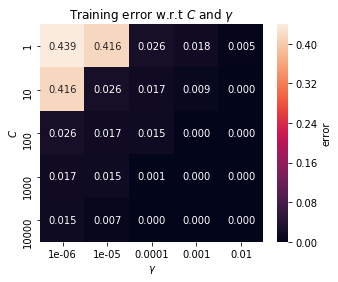

In [17]:
draw_heatmap(training_errors, gamma_list, C_list)

In [18]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.0


## SVM with 50/50 on bank note dataset trial 2


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [20]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

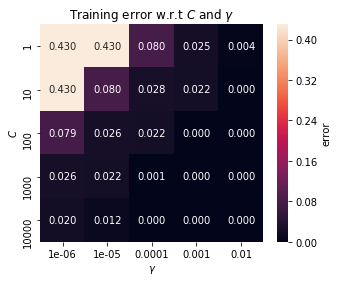

In [21]:
draw_heatmap(training_errors, gamma_list, C_list)

In [22]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.0


## SVM with 20/80 on bank note dataset trial 2



In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [24]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

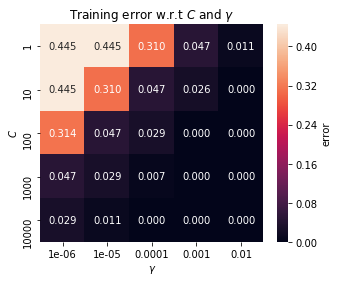

In [25]:
draw_heatmap(training_errors, gamma_list, C_list)

In [26]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.0


### Trial 3

## SVM with 80/20 on bank note dataset trial 3

In [27]:
X = data[["V1","V2","V3","V4"]]
Y = data["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [28]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

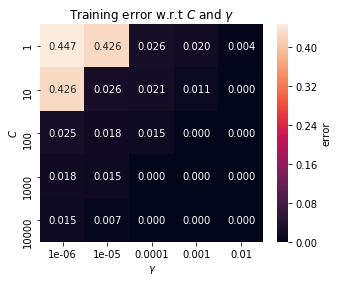

In [29]:
draw_heatmap(training_errors, gamma_list, C_list)

In [30]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.0


## SVM with 50/50 on bank note dataset trial 3


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [32]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

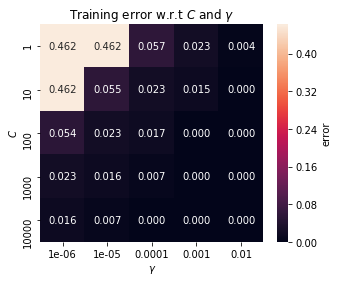

In [33]:
draw_heatmap(training_errors, gamma_list, C_list)

In [34]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.0


## SVM with 20/80 on bank note dataset trial 3


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [36]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

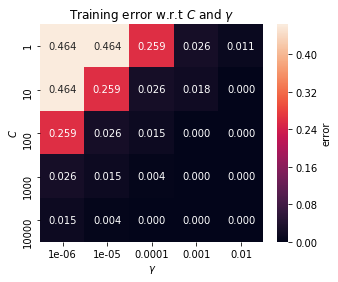

In [37]:
draw_heatmap(training_errors, gamma_list, C_list)

In [38]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10, best parameter gamma* = 0.01
Test error: 0.0


# KNN

### trial 1

## KNN with 80/20 on bank note dataset trial 1

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [40]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

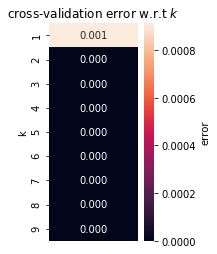

In [41]:
# Draw heatmaps for result of grid search.
def knn_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='k')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [42]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 2


## KNN with 50/50 on bank note dataset trial 1

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [44]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

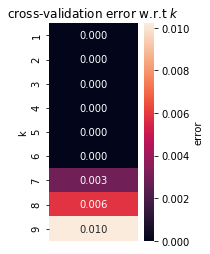

In [45]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [46]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


## KNN with 20/80 on bank note dataset trial 1

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [48]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

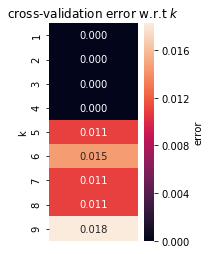

In [49]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [50]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


# KNN

### trial 2

## KNN with 80/20 on bank note dataset trial 2

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [52]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

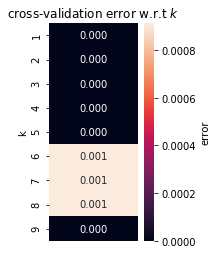

In [53]:


# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [54]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


## KNN with 50/50 on bank note dataset trial 2

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [56]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

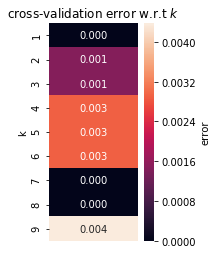

In [57]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [58]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


## KNN with 20/80 on bank note dataset trial 2

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [60]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

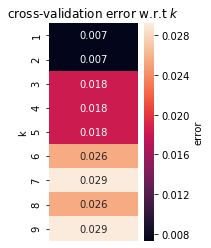

In [61]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [62]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


### trial 3

## KNN with 80/20 on bank note dataset trial 3

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [64]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

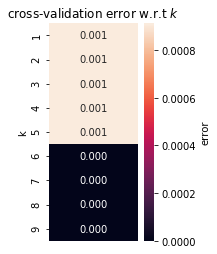

In [65]:


# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [66]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 6


## KNN with 50/50 on bank note dataset trial 3

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [68]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

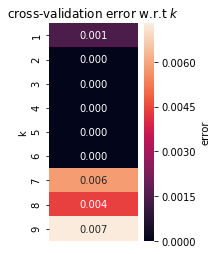

In [69]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [70]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 2


## KNN with 20/80 on bank note dataset trial 3

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [72]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

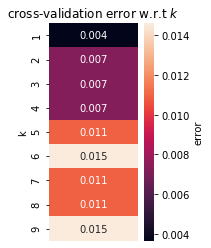

In [73]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [74]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


# Random Forest

### trial 1

## Random Forest with 80/20 on bank note dataset trial 1

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [76]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9745454545454545

## Random Forest with 50/50 on bank note dataset trial 1

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [78]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9752186588921283

## Random Forest with 20/80  on bank note dataset trial 1

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [80]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9581056466302368

### trial 2

## Random Forest with 80/20  on bank note dataset trial 2

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [82]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9818181818181818

## Random Forest with 50/50 on bank note dataset trial 2

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [84]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9664723032069971

## Random Forest with 20/80 on bank note dataset trial 2

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [86]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9644808743169399

### trial 3

## Random Forest with 80/20 on bank note dataset trial 3

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [88]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9781818181818182

## Random Forest with 50/50 on bank note dataset trial 3

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [90]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9868804664723032

## Random Forest with 20/80 on bank note dataset trial 3

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [92]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9517304189435337

# END OF BANK NOTE DATASET

# Abalone dataset

In [93]:
# load bank note data
abalone_data = pd.read_csv('abalone.csv')
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [94]:
abalone_data.shape

(4177, 9)

In [95]:
# drop all infant abalones tagged with "I" in "Sex" column
abalone_data = abalone_data[abalone_data["Sex"] != "I"]

In [96]:
abalone_data.shape

(2835, 9)

In [97]:
X = abalone_data[[ "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]]
Y = abalone_data["Sex"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

# SVM on Abalone dataset

### trial 1

## SVM with 80/20 on Abalone dataset trial 1

In [98]:
#training and test datasets
X = abalone_data[[ "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]]
Y = abalone_data["Sex"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [99]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

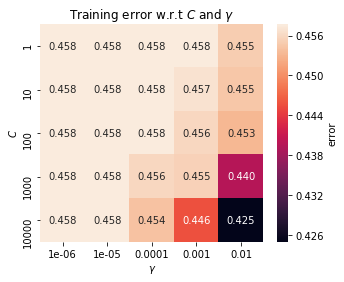

In [100]:
draw_heatmap(training_errors, gamma_list, C_list)

In [101]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.4426807760141094


## SVM with 50/50 on Abalone dataset trial 1


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [103]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

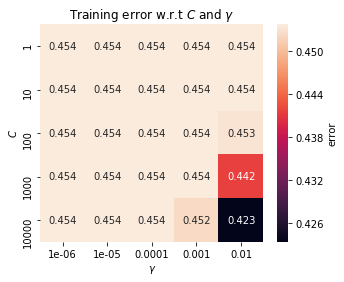

In [104]:
draw_heatmap(training_errors, gamma_list, C_list)

In [105]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.4590973201692524


## SVM with 20/80 on Abalone dataset trial 1


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [107]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

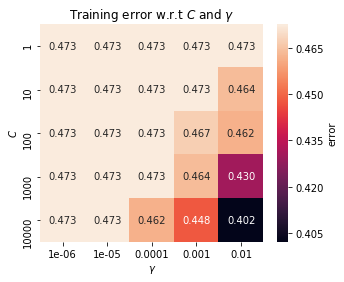

In [108]:
draw_heatmap(training_errors, gamma_list, C_list)

In [109]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.4457671957671958


### trial 2

## SVM with 80/20 on Abalone dataset trial 2

In [110]:
#training and test datasets
X = abalone_data[[ "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]]
Y = abalone_data["Sex"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [111]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

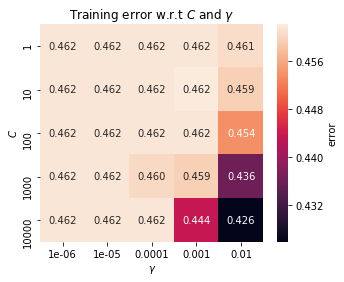

In [112]:
draw_heatmap(training_errors, gamma_list, C_list)

In [113]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.4620811287477954


## SVM with 50/50 on Abalone dataset trial 2


In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [115]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

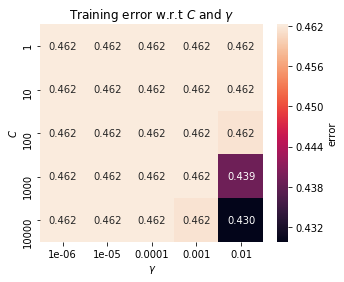

In [116]:
draw_heatmap(training_errors, gamma_list, C_list)

In [117]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.45204513399153734


## SVM with 20/80 on Abalone dataset trial 2


In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [119]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

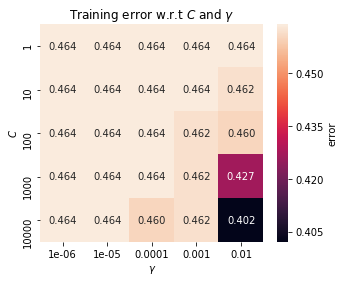

In [120]:
draw_heatmap(training_errors, gamma_list, C_list)

In [121]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.4607583774250441


### trial 3

## SVM with 80/20 on Abalone dataset trial 3


In [122]:
#training and test datasets
X = abalone_data[[ "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]]
Y = abalone_data["Sex"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [123]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

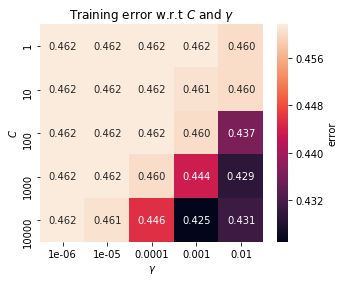

In [124]:
draw_heatmap(training_errors, gamma_list, C_list)

In [125]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.001
Test error: 0.47089947089947093


## SVM with 50/50 on Abalone dataset trial 3


In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [127]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

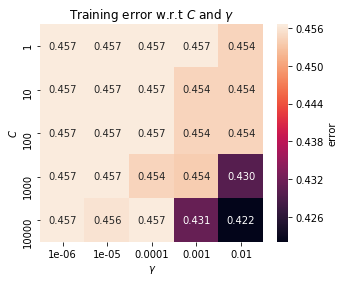

In [128]:
draw_heatmap(training_errors, gamma_list, C_list)

In [129]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.46191819464033845


## SVM with 20/80 on Abalone dataset trial 3


In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [131]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

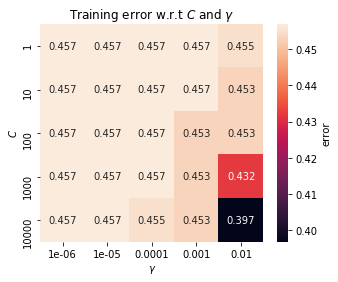

In [132]:
draw_heatmap(training_errors, gamma_list, C_list)

In [133]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.455026455026455


# KNN

### trial 1

## KNN with 80/20 on Abalone dataset trial 1

In [280]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [135]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

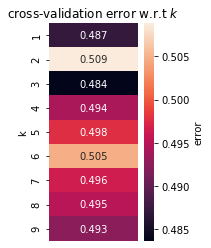

In [136]:


# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [137]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 3


## KNN with 50/50 on Abalone dataset trial 1

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [139]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

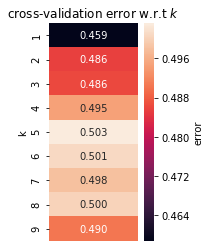

In [140]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [141]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


## KNN with 20/80 on Abalone dataset trial 1

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [143]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

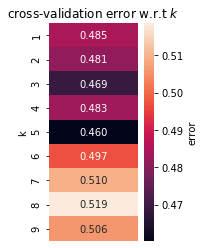

In [144]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [145]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 5


### trial 2

## KNN with 80/20 on Abalone dataset trial 2

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [147]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

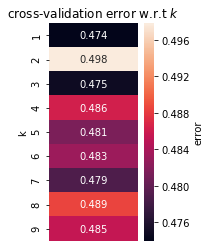

In [148]:


# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [149]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


## KNN with 50/50 on Abalone dataset trial 2

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [151]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

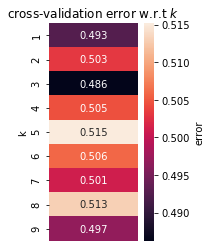

In [152]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [153]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 3


## KNN with 20/80 on Abalone dataset trial 2

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [155]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

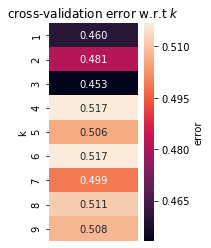

In [156]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [157]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 3


### trial 3

## KNN with 80/20 on Abalone dataset trial 3

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [159]:
# Perform grid search for best number of nearest neighbors.

# 1. Create a k-NN classifier.
estimator = neighbors.KNeighborsClassifier()

# 2. Create a grid searcher with 5-fold cross-validation.
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

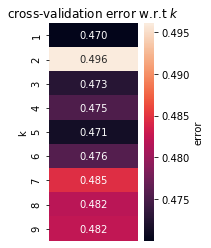

In [160]:


# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [161]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 1


## KNN with 50/50 on Abalone dataset trial 3

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [163]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

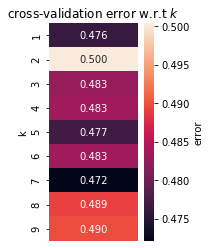

In [164]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [165]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 7


## KNN with 20/80 on Abalone dataset trial 3

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [167]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

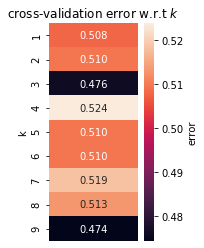

In [168]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [169]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 9


# Random Forest

### trial 1

## Random Forest with 80/20 on Abalone dataset trial 1

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [171]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.564373897707231

## Random Forest with 50/50 on Abalone dataset trial 1

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [173]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5338504936530324

## Random Forest with 20/80 on Abalone dataset trial 1

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [175]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5264550264550265

### trial 2

## Random Forest with 80/20 on Abalone dataset trial 2

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [177]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5573192239858906

## Random Forest with 50/50 on Abalone dataset trial 2

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [179]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5458392101551481

## Random Forest with 20/80 on Abalone dataset trial 2

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [181]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5299823633156967

### trial 3

## Random Forest with 80/20 on Abalone dataset trial 3

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [183]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5361552028218695

## Random Forest with 50/50 on Abalone dataset trial 3

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [185]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5535966149506347

## Random Forest with 20/80 on Abalone dataset trial 3

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [187]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5414462081128748

# END OF ABALONE DATASET

# Citrus dataset

# SVM on Citrus dataset

In [188]:
citrus_data = pd.read_csv('citrus.csv')
citrus_data.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


### trial 1

## SVM with 80/20 on Citrus dataset trial 1

In [189]:
# training and test datasets
X = citrus_data[["diameter","weight","red","green","blue"]]
Y = citrus_data["name"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [190]:

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

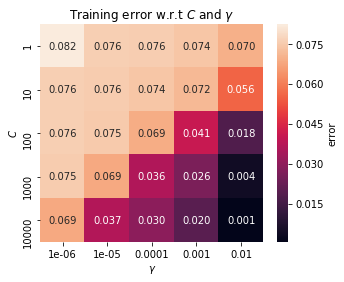

In [191]:
draw_heatmap(training_errors, gamma_list, C_list)

In [192]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.07699999999999996


## SVM with 50/50 on Citrus dataset trial 1


In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [194]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

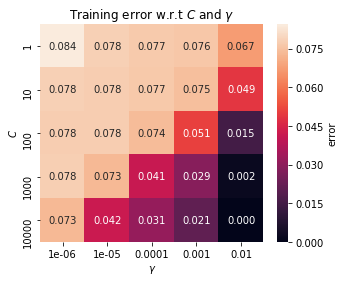

In [195]:
draw_heatmap(training_errors, gamma_list, C_list)

In [196]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.10840000000000005


## SVM with 20/80 on Citrus dataset trial 1


In [197]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [198]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

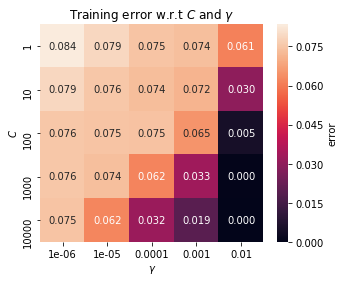

In [199]:
draw_heatmap(training_errors, gamma_list, C_list)

In [200]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.13137500000000002


### trial 2

## SVM with 80/20 on Citrus dataset on Citrus dataset trial 2

In [201]:
# training and test datasets
X = citrus_data[["diameter","weight","red","green","blue"]]
Y = citrus_data["name"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [202]:

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

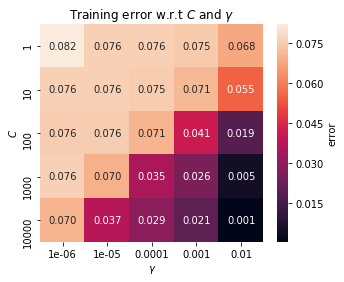

In [203]:
draw_heatmap(training_errors, gamma_list, C_list)

In [204]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.07199999999999995


## SVM with 50/50 on Citrus dataset trial 2


In [205]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [206]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

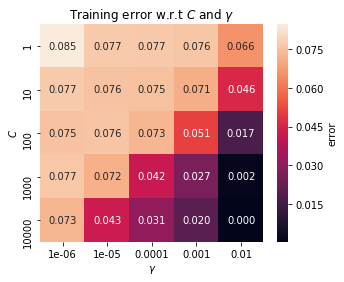

In [207]:
draw_heatmap(training_errors, gamma_list, C_list)

In [208]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.10340000000000005


## SVM with 20/80 on Citrus dataset trial 2


In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [210]:
# SVM Classifer

clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.536625

In [211]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

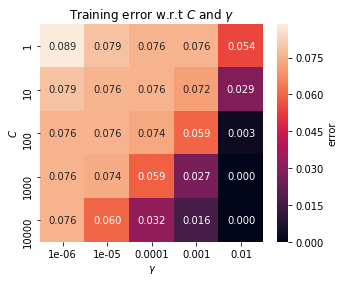

In [212]:
draw_heatmap(training_errors, gamma_list, C_list)

In [213]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 1000, best parameter gamma* = 0.01
Test error: 0.13387499999999997


### trial 3

## SVM with 80/20 on Citrus dataset on Citrus dataset trial 3

In [214]:
# training and test datasets
X = citrus_data[["diameter","weight","red","green","blue"]]
Y = citrus_data["name"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [215]:

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

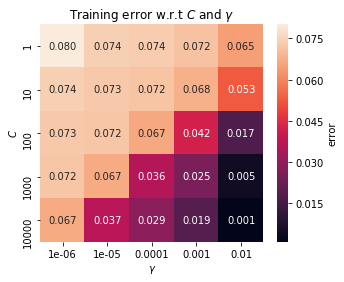

In [216]:
draw_heatmap(training_errors, gamma_list, C_list)

In [217]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.08650000000000002


## SVM with 50/50 on Citrus dataset trial 3


In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [219]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

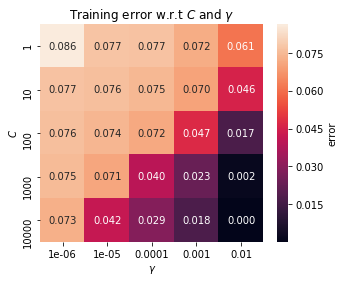

In [220]:
draw_heatmap(training_errors, gamma_list, C_list)

In [221]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 10000, best parameter gamma* = 0.01
Test error: 0.09699999999999998


## SVM with 20/80 on Citrus dataset trial 3


In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [223]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

opt_e_training = 1.0   # Optimal training error.
opt_classifier = None  # Optimal classifier.
opt_C          = None  # Optimal C.
opt_gamma      = None  # Optimal C.

# Training errors
training_errors = np.zeros((len(C_list), len(gamma_list)))

for i, C in enumerate(C_list):
    for j, gamma in enumerate(gamma_list):
        # Create a SVM classifier with RBF kernel.
        classifier = svm.SVC(kernel='rbf', C=C, gamma=gamma)

        # Use the classifier to fit the training set (use X_train, Y_train).
        classifier.fit(X_train, Y_train)

        # Show decision boundary, training error and test error.
        e_training = calc_error(X_train, Y_train, classifier)
        training_errors[i,j] = e_training
        
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C          = C
            opt_gamma      = gamma

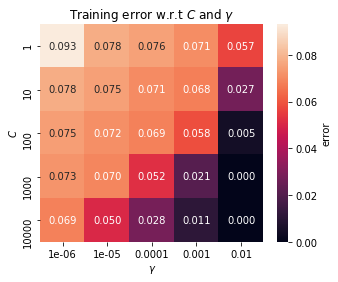

In [224]:
draw_heatmap(training_errors, gamma_list, C_list)

In [225]:
# Obtain the weights and bias from the best linear SVM classifier .
print('Best parameter C* = {}, best parameter gamma* = {}'.format(opt_C, opt_gamma))
print('Test error: {}'.format(calc_error(X_test, Y_test, classifier)))

Best parameter C* = 1000, best parameter gamma* = 0.01
Test error: 0.11787499999999995


# KNN

### trial 1

## KNN with 80/20 on Citrus dataset trial 1

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [227]:

k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

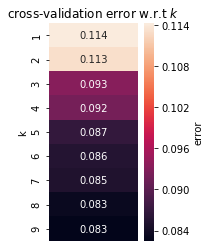

In [228]:


# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [229]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 9


## KNN with 50/50 on Citrus dataset trial 1

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [231]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

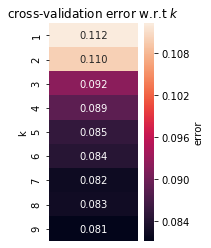

In [232]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [233]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 9


## KNN with 20/80 on Citrus dataset trial 1

In [234]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [235]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

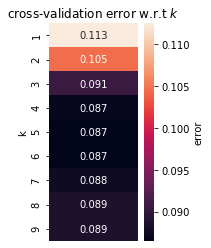

In [236]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [237]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 5


### trial 2

## KNN with 80/20 on Citrus dataset trial 2

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [239]:

k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

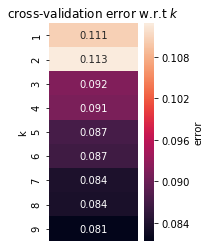

In [240]:


# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [241]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 9


## KNN with 50/50 on Citrus dataset trial 2

In [242]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [243]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

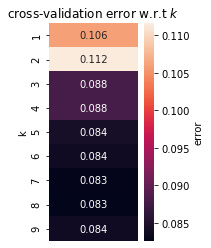

In [244]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [245]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 8


## KNN with 20/80  on Citrus dataset trial 2

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [247]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

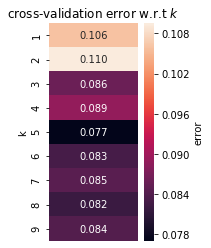

In [248]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [249]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 5


### trial 3

## KNN with 80/20 on Citrus dataset trial 3

In [250]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [251]:

k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': k_list}
grid_search = GridSearchCV(estimator, param_grid, cv=5)

# 3. Use the grid searcher to fit the training set.
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

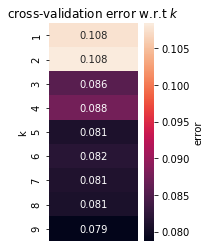

In [252]:


# Draw heatmaps of cross-validation errors (in cross-validation).
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [253]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 9


## KNN with 50/50 on Citrus dataset trial 3

In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [255]:
grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

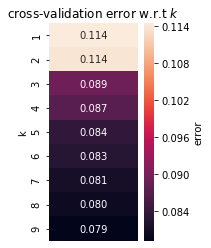

In [256]:
# Draw heatmaps for 50% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [257]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 9


## KNN with 20/80 on Citrus dataset trial 3

In [258]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [259]:
estimator = neighbors.KNeighborsClassifier()


grid_search = GridSearchCV(estimator, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

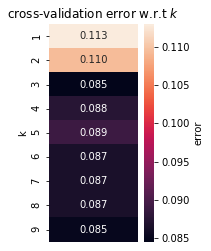

In [260]:
# Draw heatmaps for 80% test size
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
knn_heatmap(cross_val_errors, k_list, title='cross-validation error w.r.t $k$')

In [261]:
# Show the best k.
best_k = grid_search.best_params_['n_neighbors']
print("Best number of nearest neighbors (k): {}".format(best_k))

Best number of nearest neighbors (k): 3


# Random Forest

### trial 1

## Random Forest with 80/20 on Citrus dataset trial 1

In [262]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

In [263]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.932

## Random Forest with 50/50 on Citrus dataset trial 1

In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 26)

In [265]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9312

## Random Forest with 20/80 on Citrus dataset trial 1

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 26)

In [267]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.921875

### trial 2

## Random Forest with 80/20 on Citrus dataset trial 2

In [268]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 34)

In [269]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.933

## Random Forest with 50/50 on Citrus dataset trial 2

In [270]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 34)

In [271]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9284

## Random Forest with 20/80 on Citrus dataset trial 2

In [272]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 34)

In [273]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.92625

### trial 3

## Random Forest with 80/20 on Citrus dataset trial 3

In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67)

In [275]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.919

## Random Forest with 50/50 on Citrus dataset trial 3

In [276]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 67)

In [277]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.929

## Random Forest with 20/80 on Citrus dataset trial 3

In [278]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state = 67)

In [279]:
randomForest = RandomForestClassifier(max_depth = 5, random_state = 0)
randomForest.fit(X_train, Y_train)

randomForest_pred = randomForest.predict(X_test)
accuracy_score(Y_test, randomForest_pred)

C:\Users\jackn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.924375